# Lucrare de Laborator nr. 3

## Sarcina 1

In [1]:
from IPython.display import display, Math
from sympy import cos, sin, abc, pi, sympify, lambdify, exp
from sympy.abc import x, t

expr1 = 3 * cos(7 * pi * abs(x**2 - sympify('1/3')) * x**5)
f = lambdify(x, expr1, 'numpy')
expr1

3*cos(7*pi*x**5*Abs(x**2 - 1/3))

Unfortunately, I didn't manage to find something similar to **fplot** from *matlab* in python so for the following taks I am just going to increase the step size.

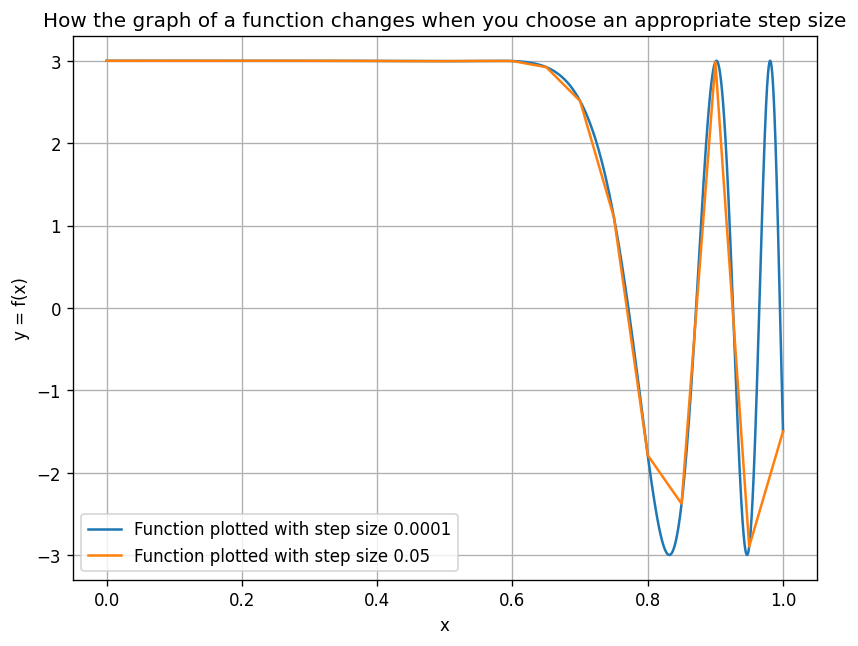

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import diff

x1 = np.arange(0, 1 + 0.05, 0.05)
y1 = f(x1)
x2 = np.arange(0, 1 + 0.0001, 0.0001)
y2 = f(x2)

plt.figure(num=None, figsize=(8, 6), dpi=120)
plt.plot(x2, y2)
plt.plot(x1, y1)
plt.grid()
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.title('How the graph of a function changes when you choose an appropriate step size')
plt.legend([
    'Function plotted with step size 0.0001', 
    'Function plotted with step size 0.05'
])

## Sarcina 2

In [3]:
x_expr = exp(t) * sin(2*t)
x = lambdify(t, x_expr, 'numpy')
x_expr

exp(t)*sin(2*t)

In [4]:
y_expr = t * (1 + cos(t))
y = lambdify(t, y_expr, 'numpy')
y_expr

t*(cos(t) + 1)

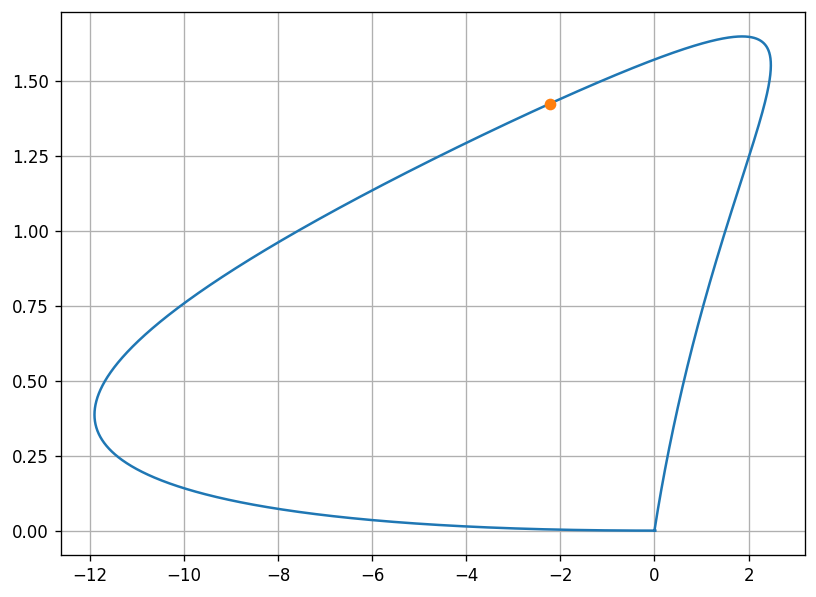

In [5]:
def xy(t):
    return (x(t), y(t))

t_range = np.arange(0, np.pi + 0.001, 0.001)
x1, y1 = xy(t_range)
t_rand = np.random.uniform(0, np.pi)
x_rand, y_rand = xy(t_rand)

plt.figure(num=None, figsize=(8, 6), dpi=120)
plt.plot(x1, y1)
plt.plot(x_rand, y_rand, marker='o')
plt.grid()

### Velocity

$$
    \overrightarrow{v} = \frac{dx}{dt} \overrightarrow{i} + \frac{dy}{dt} \overrightarrow{j}
$$

$$
    v = \sqrt{ \left(\frac{dy}{dt}\right)^2 + \left(\frac{dx}{dt}\right)^2 }
$$

In [6]:
dx_dt = diff(x_expr)
dy_dt = diff(y_expr)
i_component = dx_dt.subs(t, t_rand).evalf(2)
j_component = dy_dt.subs(t, t_rand).evalf(2)
v_magnitude = i_component**2 + j_component**2
print('The magnitude of the velocity is', v_magnitude)
print('The i component of the velocity is', i_component, 'The j component of the velocity is', j_component)

The magnitude of the velocity is 1.7e+2
The i component of the velocity is -13. The j component of the velocity is -0.93


## Sarcina 3

In [7]:
x_expr = 2 * exp(-t) * sin(t)
x = lambdify(t, x_expr, 'numpy')
x_expr

2*exp(-t)*sin(t)

In [8]:
y_expr = 3 * exp(-t) * cos(t)
y = lambdify(t, y_expr, 'numpy')
y_expr

3*exp(-t)*cos(t)

In [9]:
z_expr = sympify('3 * t**(1/3)')
z = lambdify(t, z_expr, 'numpy')
z_expr

3*t**(1/3)

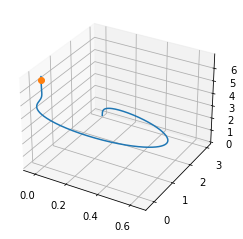

In [10]:
def xyz(t):
    return (x(t), y(t), z(t))

t_range = np.arange(0, 4 * np.pi + 0.001, 0.001)
x1, y1, z1 = xyz(t_range)
t_rand = np.random.uniform(0, 4 * np.pi)
x_rand, y_rand, z_rand = xyz(t_rand)

# ax = plt.axes(projection="3d")
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('auto')
ax.plot3D(x1, y1, z1)
ax.plot3D(x_rand, y_rand, z_rand, marker='o')